# Titanic Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
titanic= pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Dropping all categorical variables 
categorical_variable=['PassengerId', 'Name','Sex','Ticket','Cabin','Embarked']
titanic.drop(categorical_variable, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


# Exploratory Data Analysis

# Exploring the data - Continuous features

In [3]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [5]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


Age is missing at random

# Plotting the data - Continuous features

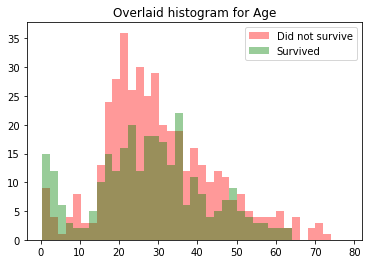

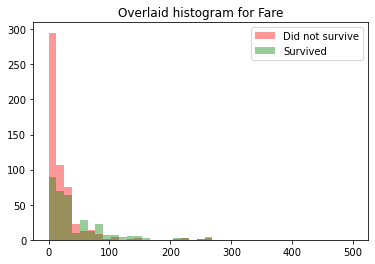

In [9]:
for i in ['Age','Fare']:
    died=list(titanic[titanic['Survived']== 0][i].dropna())
    survived= list(titanic[titanic['Survived']== 1][i].dropna())
    xmin= min(min(died), min(survived))
    xmax= max(max(died), max(survived))
    width= (xmax-xmin) / 40
    sns.distplot(died, color ='r', kde=False, bins= np.arange(xmin,xmax,width))
    sns.distplot(survived, color ='g', kde=False, bins= np.arange(xmin,xmax,width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 432x288 with 0 Axes>

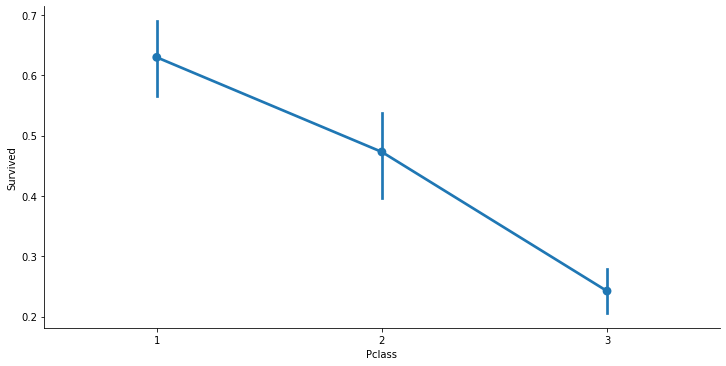

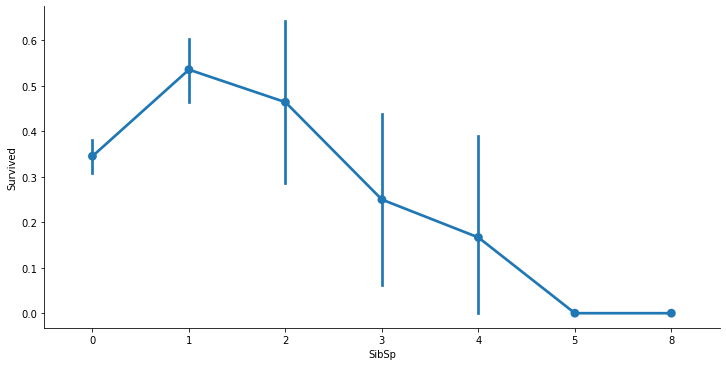

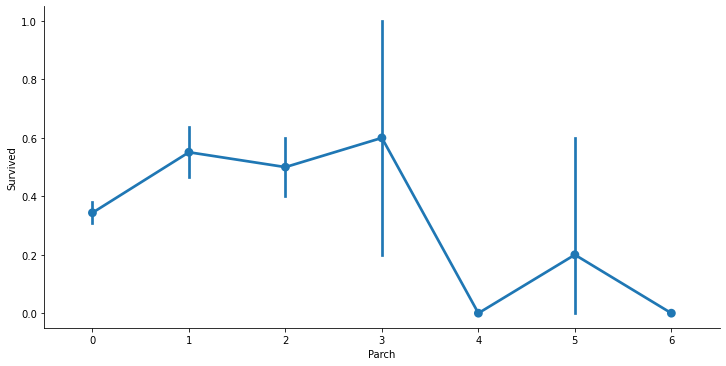

In [13]:
for i,col in enumerate(['Pclass','SibSp','Parch']):       #For iterating through all three cols
    plt.figure(i)                                         # New plot for every iteration
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2,)
    
    #Vertical bar represents sample size of each value & graph shows survival rate of each vaue

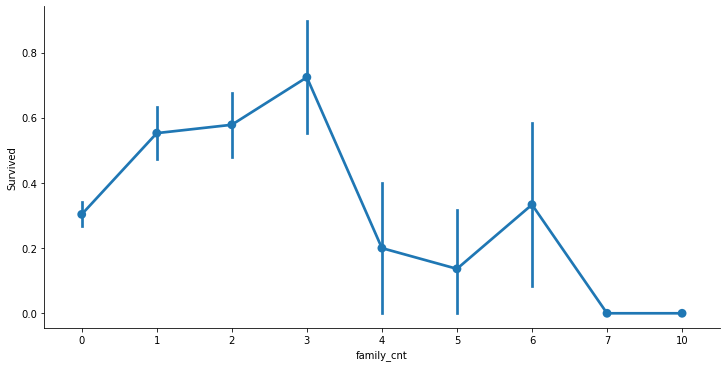

In [15]:
titanic['family_cnt']=titanic['SibSp'] + titanic['Parch']
sns.catplot(x='family_cnt',y='Survived',data=titanic,kind='point',aspect=2,)

In [16]:
#Importing the original dataset

titanic= pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#Dropping irrelevant columns
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Filling missing values - Continuous features

Filling missing value for Age Column

In [18]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [20]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [21]:
# Combining Parch & SibSp as it will maintain the information of the features as well as reduce the number of features

titanic['Family_count']=titanic['Parch']+titanic['SibSp']

#Dropping Parch & SibSp to avoid multicolinearity with Family_count
titanic.drop(['Parch','SibSp'],axis=1, inplace=True)

titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


# Exploring the data - Categorical features

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
titanic= pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#Dropping all continuous features
cont_features=['PassengerId','Pclass','Name','Age','SibSp','Parch','Fare']
titanic.drop(cont_features, axis=1, inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


# Exploring the data - Categorical features

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [27]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

#66% of people having non missing Cabin values survived whereas 30% of missing cabin value survived
#Thus, cabin is a strong indicator whether somebody survived or not

,Survived
Cabin,
False,0.666667
True,0.299854


In [29]:
titanic['Cabin_indicator']=np.where(titanic['Cabin'].isnull(), 0, 1)    #indicates whether a cabin is missing or not. 0-missing, 1- not missing
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_indicator
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


# Plotting - Categorical features

<Figure size 432x288 with 0 Axes>

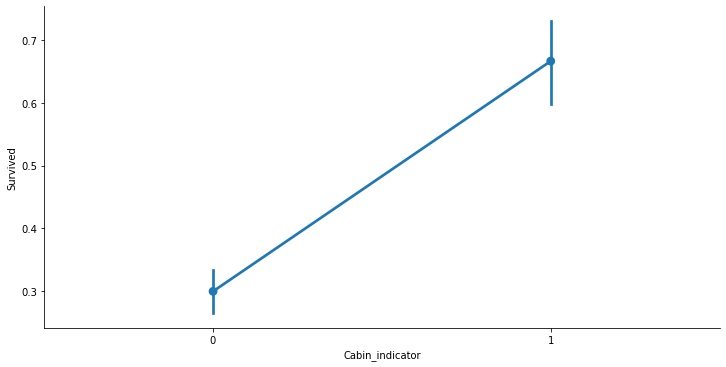

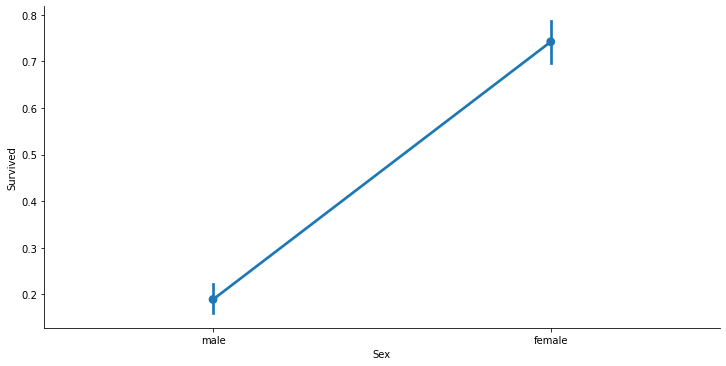

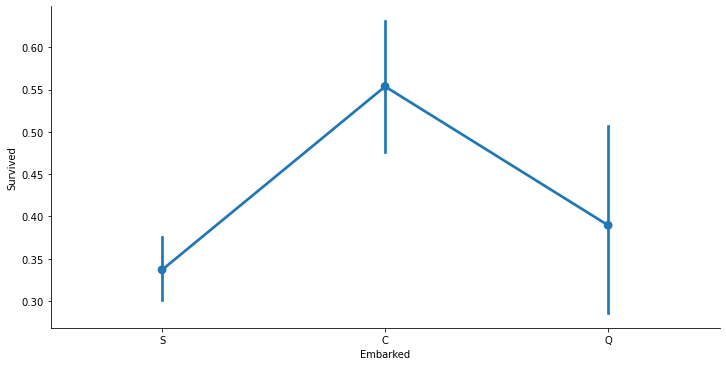

In [31]:
for i, col in enumerate(['Cabin_indicator','Sex','Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived',data=titanic, kind='point',aspect=2,)
    

People who have cabin are much more likely to survive

Men are less likely to survive

Embarked does not give us a clear picture as there may be a case that more number of men boarded at Southampton & same goes for the case of cabin indicator and embarked ie more people at Southampton did not have cabin

In [33]:
titanic.pivot_table('Survived',index='Sex',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [34]:
titanic.pivot_table('Survived',index='Cabin_indicator',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Cabin_indicator,,,
0,99,73,515
1,69,4,129


Thus, sex and cabin are important features to predict whereas embarked is repetitive 

# Data Cleaning - Categorical features

In [41]:
#Importing the original dataset

titanic= pd.read_csv('titanic.csv')
titanic.drop(['Name','Ticket'],axis=1,inplace=True)

titanic['Cabin_indicator']=np.where(titanic['Cabin'].isnull(), 0, 1)    #indicates whether a cabin is missing or not. 0-missing, 1- not missing
titanic.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_indicator
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [43]:
#Convert Sex to numeric 
gender_numeric={'male':0,'female':1}

titanic['Sex']=titanic['Sex'].map(gender_numeric)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_indicator
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


In [44]:
#Drop Cabin & Embarked Columns
titanic.drop(['Cabin','Embarked'],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_indicator
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,0
